#### Introduction

In this homework, you will perform **Market Basket Analysis** using association rule mining and **K-Means Clustering** on two different datasets. For the Market Basket Analysis, you will parse transactional data, calculate association metrics manually for selected item pairs, and then use an automated implementation to find association rules across the dataset. This will allow you to identify patterns in purchasing behavior and understand the relationships between items in a dataset.

For the K-Means Clustering section, you will cluster data points, determine the optimal number of clusters using evaluation metrics, and visualize the clusters based on key variables. By the end of this assignment, you will have gained hands-on experience in data parsing, association rule mining, clustering, and data visualization—important skills in data mining and machine learning workflows. All tasks should be completed in a Jupyter Notebook, with textual responses provided in Markdown.


#### Dataset 1: Market Basket Data for Association Rule Mining

The first dataset `store_data.csv` contains transactional data, where each row represents a single transaction and each item purchased is listed in a comma-separated format. Here’s an example of what a few rows look like:

```
shrimp,almonds,avocado,vegetables mix,green grapes,whole wheat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxidant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs
```

To prepare this dataset for association rule mining, you will need to parse it into a format where each column represents an item, and each row indicates whether that item was purchased in the transaction. In this boolean format, a value of `True` or `1` means the item was purchased in that transaction, and `False` or `0` means it was not. This transformation will allow you to apply association rule mining techniques effectively.

#### Dataset 2: Mine Detection Dataset

In the second dataset `land_mines.csv`, magnetic anomaly data is collected from sensors, capturing factors influenced by both environmental and object-specific characteristics. The dataset includes continuous features like voltage values and sensor height, as well as categorical data representing soil and mine type. This information is used to classify the type of buried mine based on the observed anomalies.

##### Data Set Columns:

1. **V (Voltage):** A continuous feature representing the output voltage value of the FLC sensor due to magnetic distortion, measured in volts.
2. **H (Height):** A continuous feature indicating the height of the sensor from the ground, measured in centimeters.
3. **S (Soil Type):** A categorical feature representing six different soil types, which vary based on moisture conditions: `dry and sandy`, `dry and humus`, `dry and limy`, `humid and sandy`, `humid and humus`, and `humid and limy`.
4. **M (Mine Type):** The target variable, representing five different types of mines commonly encountered on land.


#### Question 1: Market Basket Analysis with Association Rules

1. **Load the Dataset:**
   - Use the `pandas.read_csv()` function to load the transactional dataset from the provided CSV file. Each row in this dataset represents a transaction, and each item purchased in that transaction is separated by commas.

   - Print the top 5 rows of loaded dataset.
   
     **Hint**: Use `sep='\t'` when loading the data to ensure all items are loaded into a single column. After that, you can parse it into boolean values with `pd.Series.str.get_dummies(sep=',')`.
   
     Refer to this link for more details on how to use `read_csv`: [pandas.read_csv() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

2. **Parse the Data into Boolean Format:**
   - Convert the transactional data into a boolean format suitable for association rule mining. In this format, each unique item becomes a column, and each transaction (row) is represented by `True` (1) or `False` (0) values, where:
     - `True` indicates the item was purchased in that transaction.
     - `False` indicates the item was not purchased in that transaction.
   
  - Print the top 5 rows of loaded dataset.

     **Hint**: You can use the `pd.Series.str.get_dummies()` method to help transform the data or write a custom function that iterates through each row and creates a boolean representation.

     Refer to this link for more details on `get_dummies`: [pandas.get_dummies() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/sample_data/store_data.csv', header=None)

# Display the first 5 rows of the dataset
print("Loaded Dataset:")
print(data.head())


Loaded Dataset:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green 

In [2]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the raw data into a list of lists
transactions = data.stack().groupby(level=0).apply(list).tolist()

# Apply TransactionEncoder to parse the data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the encoded data into a DataFrame
data_boolean = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first 5 rows of the boolean-format dataset
print("Boolean Format Dataset:")
print(data_boolean.head())


Boolean Format Dataset:
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  whit

#### Question 1: Market Basket Analysis with Association Rules


3. **Calculate Lift Manually for Selected Items:**
   - Calculate  and print out the **lift** of the association rule **`ground beef -> herb & pepper`** manually:
     - **Support for `ground beef`**: The proportion of transactions that contain `ground beef`.
     - **Support for `herb & pepper`**: The proportion of transactions that contain `herb & pepper`.
     - **Support for `ground beef` AND `herb & pepper`**: The proportion of transactions that contain both `ground beef` and `herb & pepper`.

      **Lift Calculation**: Use the formula for lift:  
        ```
        Lift = Support(ground beef AND herb & pepper) / (Support(ground beef) * Support(herb & pepper))
        ```

      **Support Calculation**:
        ```
        Support(item) = Number of transactions containing the item / Total number of transactions
        ```
       **Hint**: You can use basic `pandas` operations to filter rows and count occurrences for calculating these metrics.

4. **Fit the Model to Find Association Rules:**
   - Use the `mlxtend` library to perform association rule mining on the entire dataset.
   - Set a minimum support threshold (e.g., 0.1) and a minimum confidence threshold (e.g., 0.5) to generate association rules.
   - Report the top 5 association rules with the highest lift values.

     Refer to these links for more details:
     - Apriori: [mlxtend apriori Documentation](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
     - Association Rules: [mlxtend association_rules Documentation](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [3]:
# Total number of transactions
total_transactions = len(data_boolean)

# Calculate support for 'ground beef'
support_ground_beef = data_boolean['ground beef'].sum() / total_transactions

# Calculate support for 'herb & pepper'
support_herb_pepper = data_boolean['herb & pepper'].sum() / total_transactions

# Calculate support for 'ground beef AND herb & pepper'
support_both = (data_boolean['ground beef'] & data_boolean['herb & pepper']).sum() / total_transactions

# Calculate Lift
lift = support_both / (support_ground_beef * support_herb_pepper)

# Print results
print(f"Support (ground beef): {support_ground_beef}")
print(f"Support (herb & pepper): {support_herb_pepper}")
print(f"Support (ground beef AND herb & pepper): {support_both}")
print(f"Lift: {lift}")


Support (ground beef): 0.09825356619117451
Support (herb & pepper): 0.04946007199040128
Support (ground beef AND herb & pepper): 0.015997866951073192
Lift: 3.291993841134928


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(data_boolean, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
      support                                 itemsets
0    0.020397                                (almonds)
1    0.033329                                (avocado)
2    0.010799                         (barbecue sauce)
3    0.014265                              (black tea)
4    0.011465                             (body spray)
..        ...                                      ...
252  0.011065       (mineral water, ground beef, milk)
253  0.017064  (spaghetti, mineral water, ground beef)
254  0.015731         (spaghetti, mineral water, milk)
255  0.010265    (olive oil, spaghetti, mineral water)
256  0.011465     (spaghetti, pancakes, mineral water)

[257 rows x 2 columns]


In [5]:

# Add num_itemsets argument
num_itemsets = frequent_itemsets.shape[0]

# Generate association rules with the additional argument
rules = association_rules(frequent_itemsets, num_itemsets, metric="confidence", min_threshold=0.1)

# Sort rules by lift and display the top 5
top_rules = rules.sort_values(by="lift", ascending=False).head(5)

print("Top 5 Association Rules by Lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 Association Rules by Lift:
                    antecedents                 consequents   support  \
185             (herb & pepper)               (ground beef)  0.015998   
184               (ground beef)             (herb & pepper)  0.015998   
307               (ground beef)  (spaghetti, mineral water)  0.017064   
304  (spaghetti, mineral water)               (ground beef)  0.017064   
315                 (olive oil)  (spaghetti, mineral water)  0.010265   

     confidence      lift  
185    0.323450  3.291994  
184    0.162822  3.291994  
307    0.173677  2.907928  
304    0.285714  2.907928  
315    0.155870  2.609786  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Question 2: K-Means Clustering

1. **Load the Dataset:**
   - Use the `pandas.read_csv()` function to load the Mine Detection dataset from the provided CSV file.
   - Print the top 5 rows of loaded dataset.
   
    Refer to this link for more details on how to use `read_csv`: [pandas.read_csv() Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

2. **Scale the Data:**
   - Scale the first three columns (`V`, `H`, and `S`) using standard scaling techniques to ensure that all features contribute equally to the clustering.
   - Print the top 5 rows of scaled dataset.
   - **Hint:** You can use `StandardScaler` from `scikit-learn` to scale the data.
   
    Refer to this link for more details on `StandardScaler`: [scikit-learn StandardScaler Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).



3. **Determine the Best K Using the Elbow Plot:**
   - Plot the within-cluster sum of squares (WCSS) for a range of values for `K` (e.g., from 1 to 10) to identify the "elbow point," which indicates the best number of clusters.
   
    **Hint:** The elbow point is where the WCSS curve begins to flatten, suggesting that adding more clusters doesn’t significantly reduce the WCSS.

4. **Run K-Means Clustering Using the Best K:**
   - Use the scaled values of `V`, `H`, and `S` to perform K-Means clustering with the best `K` found in step 3.
   - **Hint:** Use the `KMeans` class from `scikit-learn` and set `random_state=42` for consistency.

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/sample_data/land_mines.csv")  # Replace with the actual file path

# Display the first 5 rows of the dataset
print(data.head())


          V         H    S  M
0  0.338157  0.000000  0.0  1
1  0.320241  0.181818  0.0  1
2  0.287009  0.272727  0.0  1
3  0.256284  0.454545  0.0  1
4  0.262840  0.545455  0.0  1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from sklearn.preprocessing import StandardScaler

# Extract the columns to be scaled
features = ['V', 'H', 'S']
scaler = StandardScaler()

# Apply StandardScaler
data_scaled = pd.DataFrame(scaler.fit_transform(data[features]), columns=features)

# Add back the target column (M) if needed
data_scaled['M'] = data['M']

# Display the first 5 rows of the scaled dataset
print(data_scaled.head())


          V         H         S  M
0 -0.472960 -1.665222 -1.464942  1
1 -0.564586 -1.070248 -1.464942  1
2 -0.734548 -0.772762 -1.464942  1
3 -0.891686 -0.177788 -1.464942  1
4 -0.858157  0.119699 -1.464942  1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


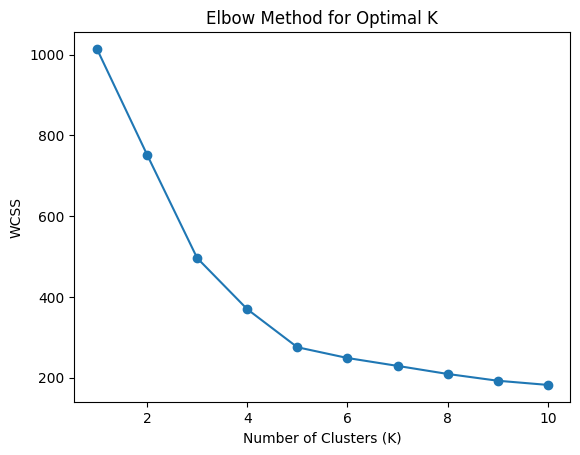

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS (Within-Cluster Sum of Squares) for different K values
wcss = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[features])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(K_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [12]:
# Optimal K from the elbow plot
optimal_k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_scaled['Cluster'] = kmeans.fit_predict(data_scaled[features])

# Display the first few rows with cluster labels
print(data_scaled.head())


          V         H         S  M  Cluster
0 -0.472960 -1.665222 -1.464942  1        2
1 -0.564586 -1.070248 -1.464942  1        2
2 -0.734548 -0.772762 -1.464942  1        2
3 -0.891686 -0.177788 -1.464942  1        2
4 -0.858157  0.119699 -1.464942  1        3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Authentication: Write Down Your Information

In the following code block, print your Student ID, Name, and Homework number in the specified format:

```python
# Replace the placeholders with your actual information
info = [yourid, yourname, homework_number]
for id, name, homework in info:
    print(f'ID: {id}\nName: {name}\nHomework: {homework}')


In [13]:
info = [('1002162937', 'Swathi Manjunatha', '005')]
for id, name, homework in info:
    print(f'ID: {id}\nName: {name}\nHomework: {homework}')

ID: 1002162937
Name: Swathi Manjunatha
Homework: 005


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Question 2: K-Means Clustering


5. **Plot Feature Pairs Against Cluster Assignments:**
   - Use the selected `K` value to re-run K-Means clustering on `V`, `H`, and `S` and assign each data point to a cluster.
   - Create scatter plots for the following feature pairs, using **cluster labels as the color**:
     - **V vs. H**
     - **H vs. S**
     - **V vs. S**

   **Hint:** You can use `matplotlib` or `seaborn` for visualization.

6. **Plot Feature Pairs Against Mine Type (Target Variable M):**
   - Create the same scatter plots (V vs. H, H vs. S, V vs. S), but this time color the points based on the **mine type (`M`)** instead of cluster labels.
   - This will allow you to visually compare the clustering results with the actual mine types.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


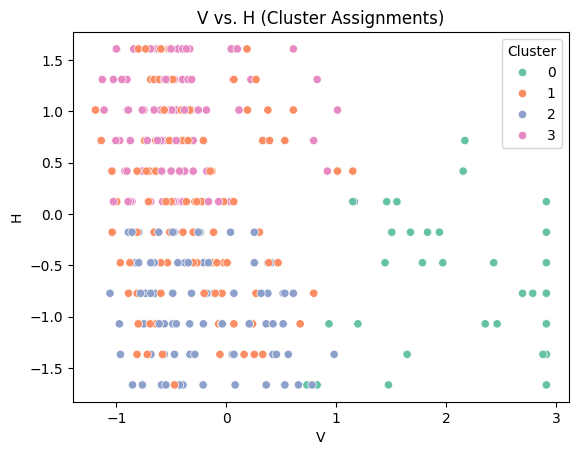

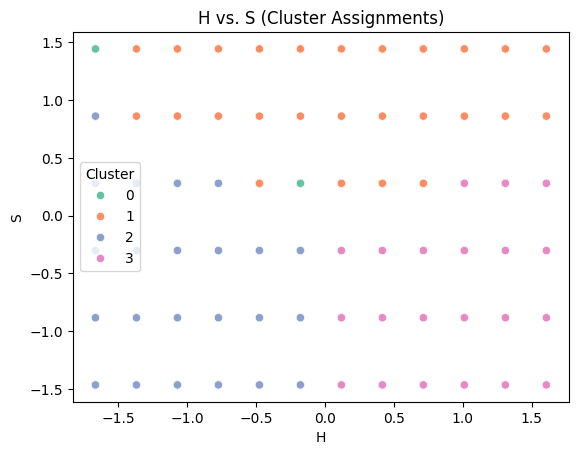

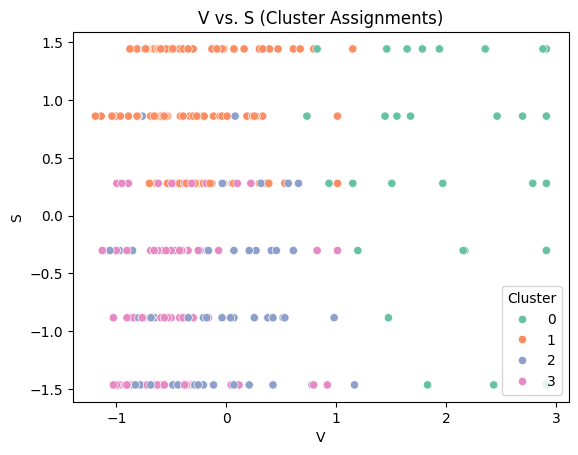

In [14]:
import seaborn as sns

# V vs. H
sns.scatterplot(data=data_scaled, x='V', y='H', hue='Cluster', palette='Set2')
plt.title('V vs. H (Cluster Assignments)')
plt.show()

# H vs. S
sns.scatterplot(data=data_scaled, x='H', y='S', hue='Cluster', palette='Set2')
plt.title('H vs. S (Cluster Assignments)')
plt.show()

# V vs. S
sns.scatterplot(data=data_scaled, x='V', y='S', hue='Cluster', palette='Set2')
plt.title('V vs. S (Cluster Assignments)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


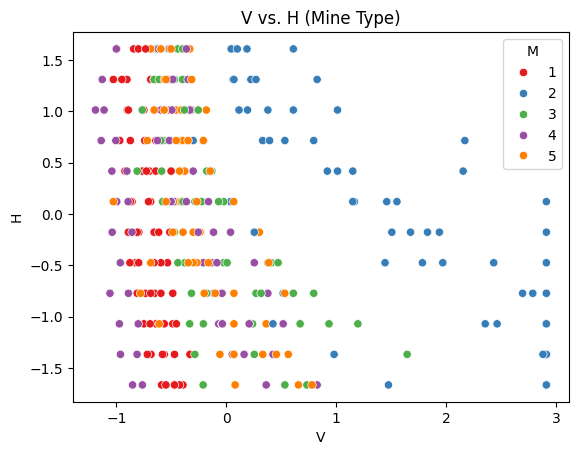

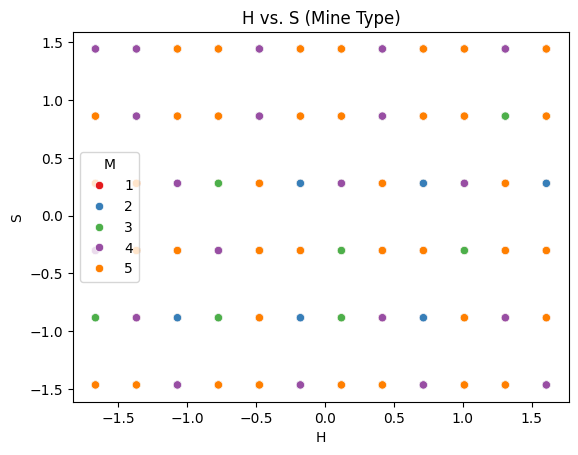

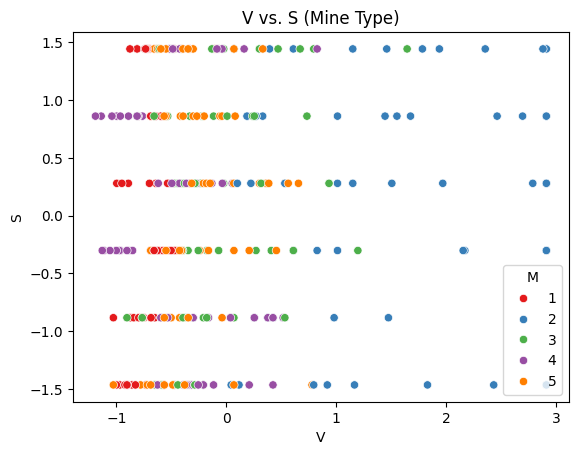

In [15]:
# V vs. H
sns.scatterplot(data=data_scaled, x='V', y='H', hue='M', palette='Set1')
plt.title('V vs. H (Mine Type)')
plt.show()

# H vs. S
sns.scatterplot(data=data_scaled, x='H', y='S', hue='M', palette='Set1')
plt.title('H vs. S (Mine Type)')
plt.show()

# V vs. S
sns.scatterplot(data=data_scaled, x='V', y='S', hue='M', palette='Set1')
plt.title('V vs. S (Mine Type)')
plt.show()
